In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
df.drop(["Unnamed: 32"],axis="columns",inplace=True)

In [7]:
df.drop(["id"],axis="columns",inplace=True)

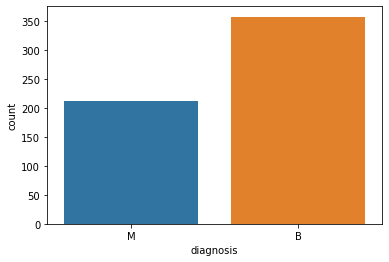

In [10]:
sns.countplot(x='diagnosis', data=df)

In [11]:
df.shape

(569, 31)

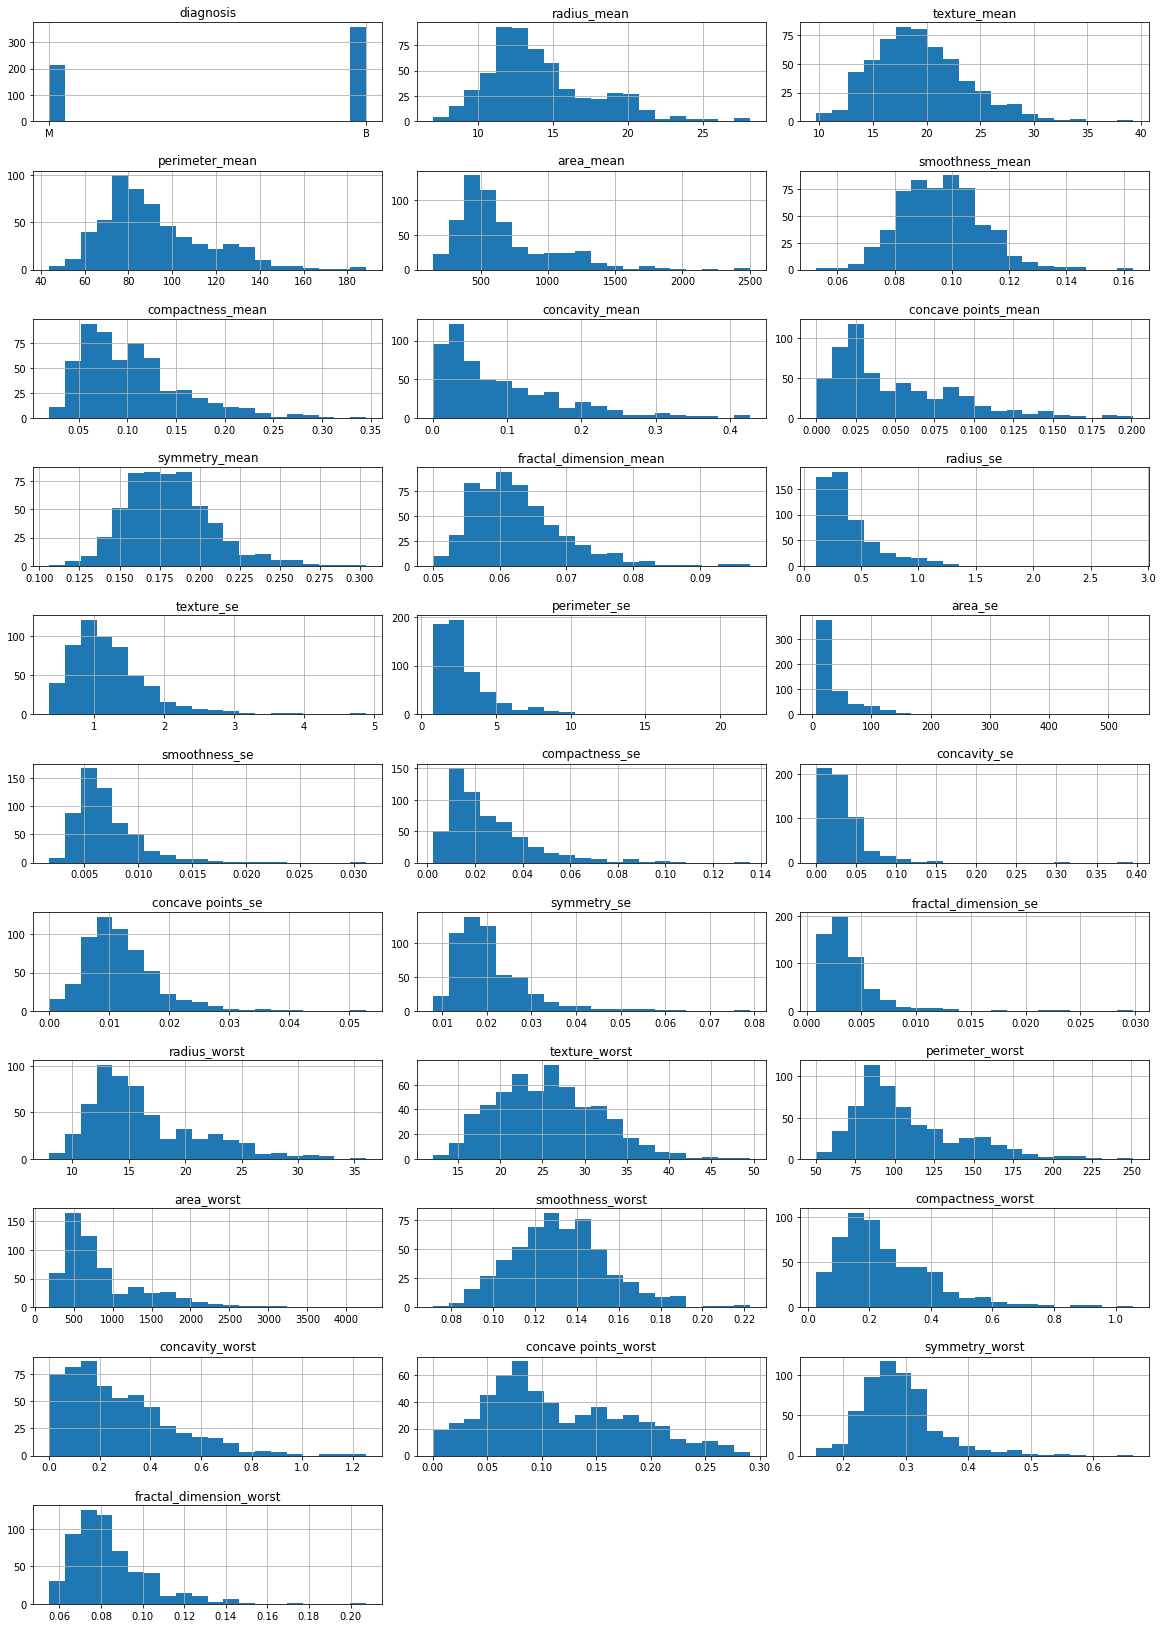

In [14]:
import itertools
col = df.columns[:31]
plt.subplots(figsize = (20, 40))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

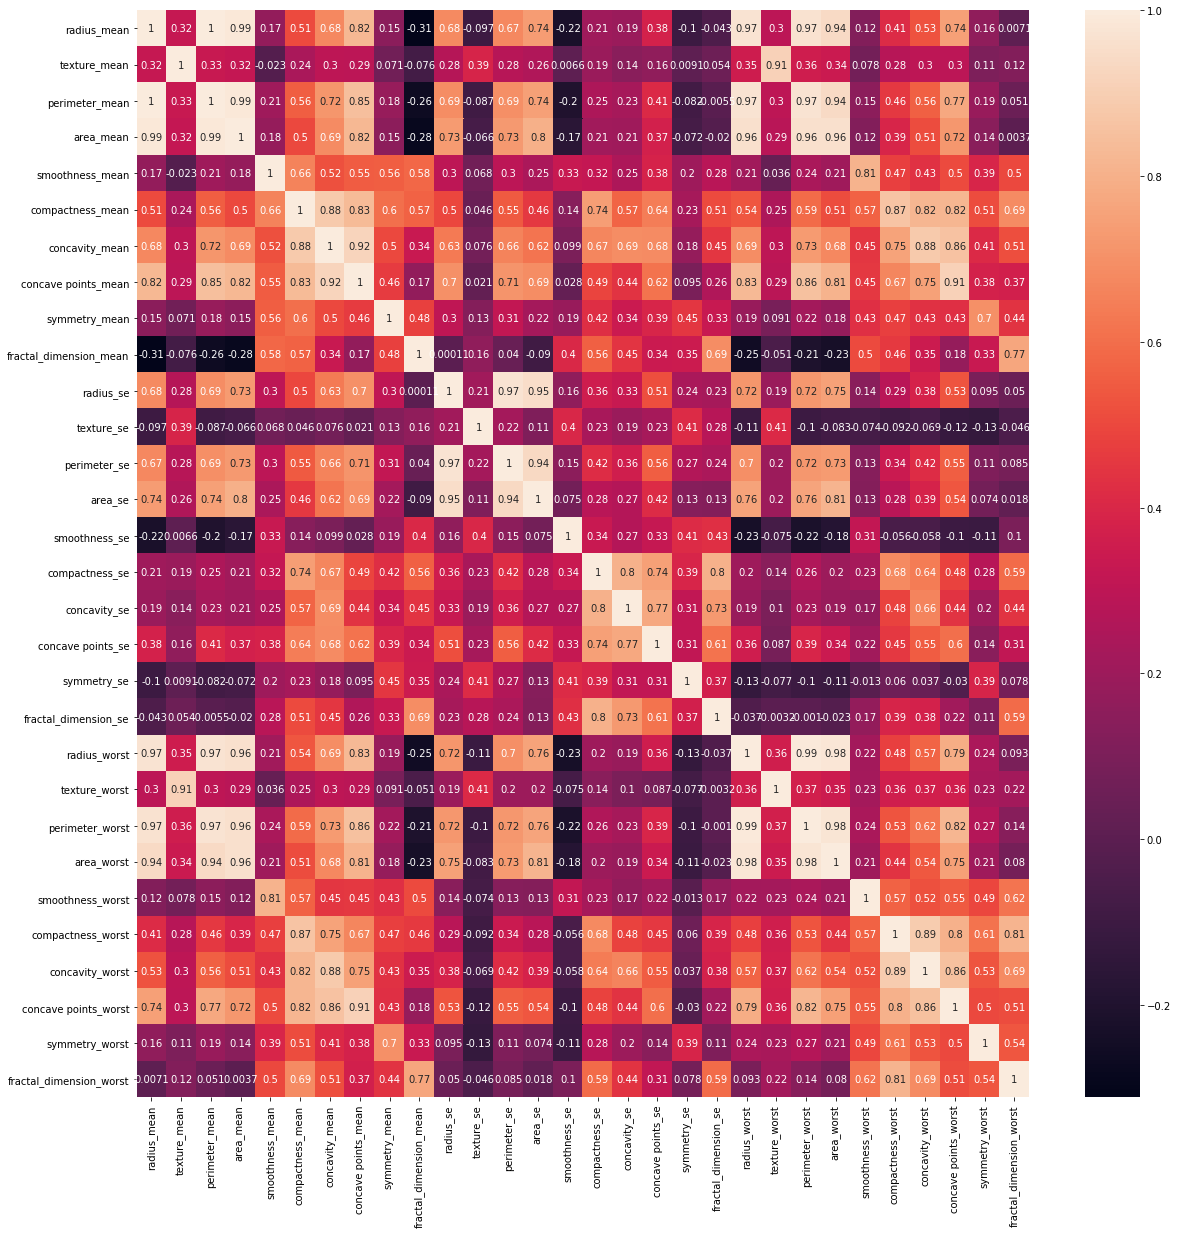

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

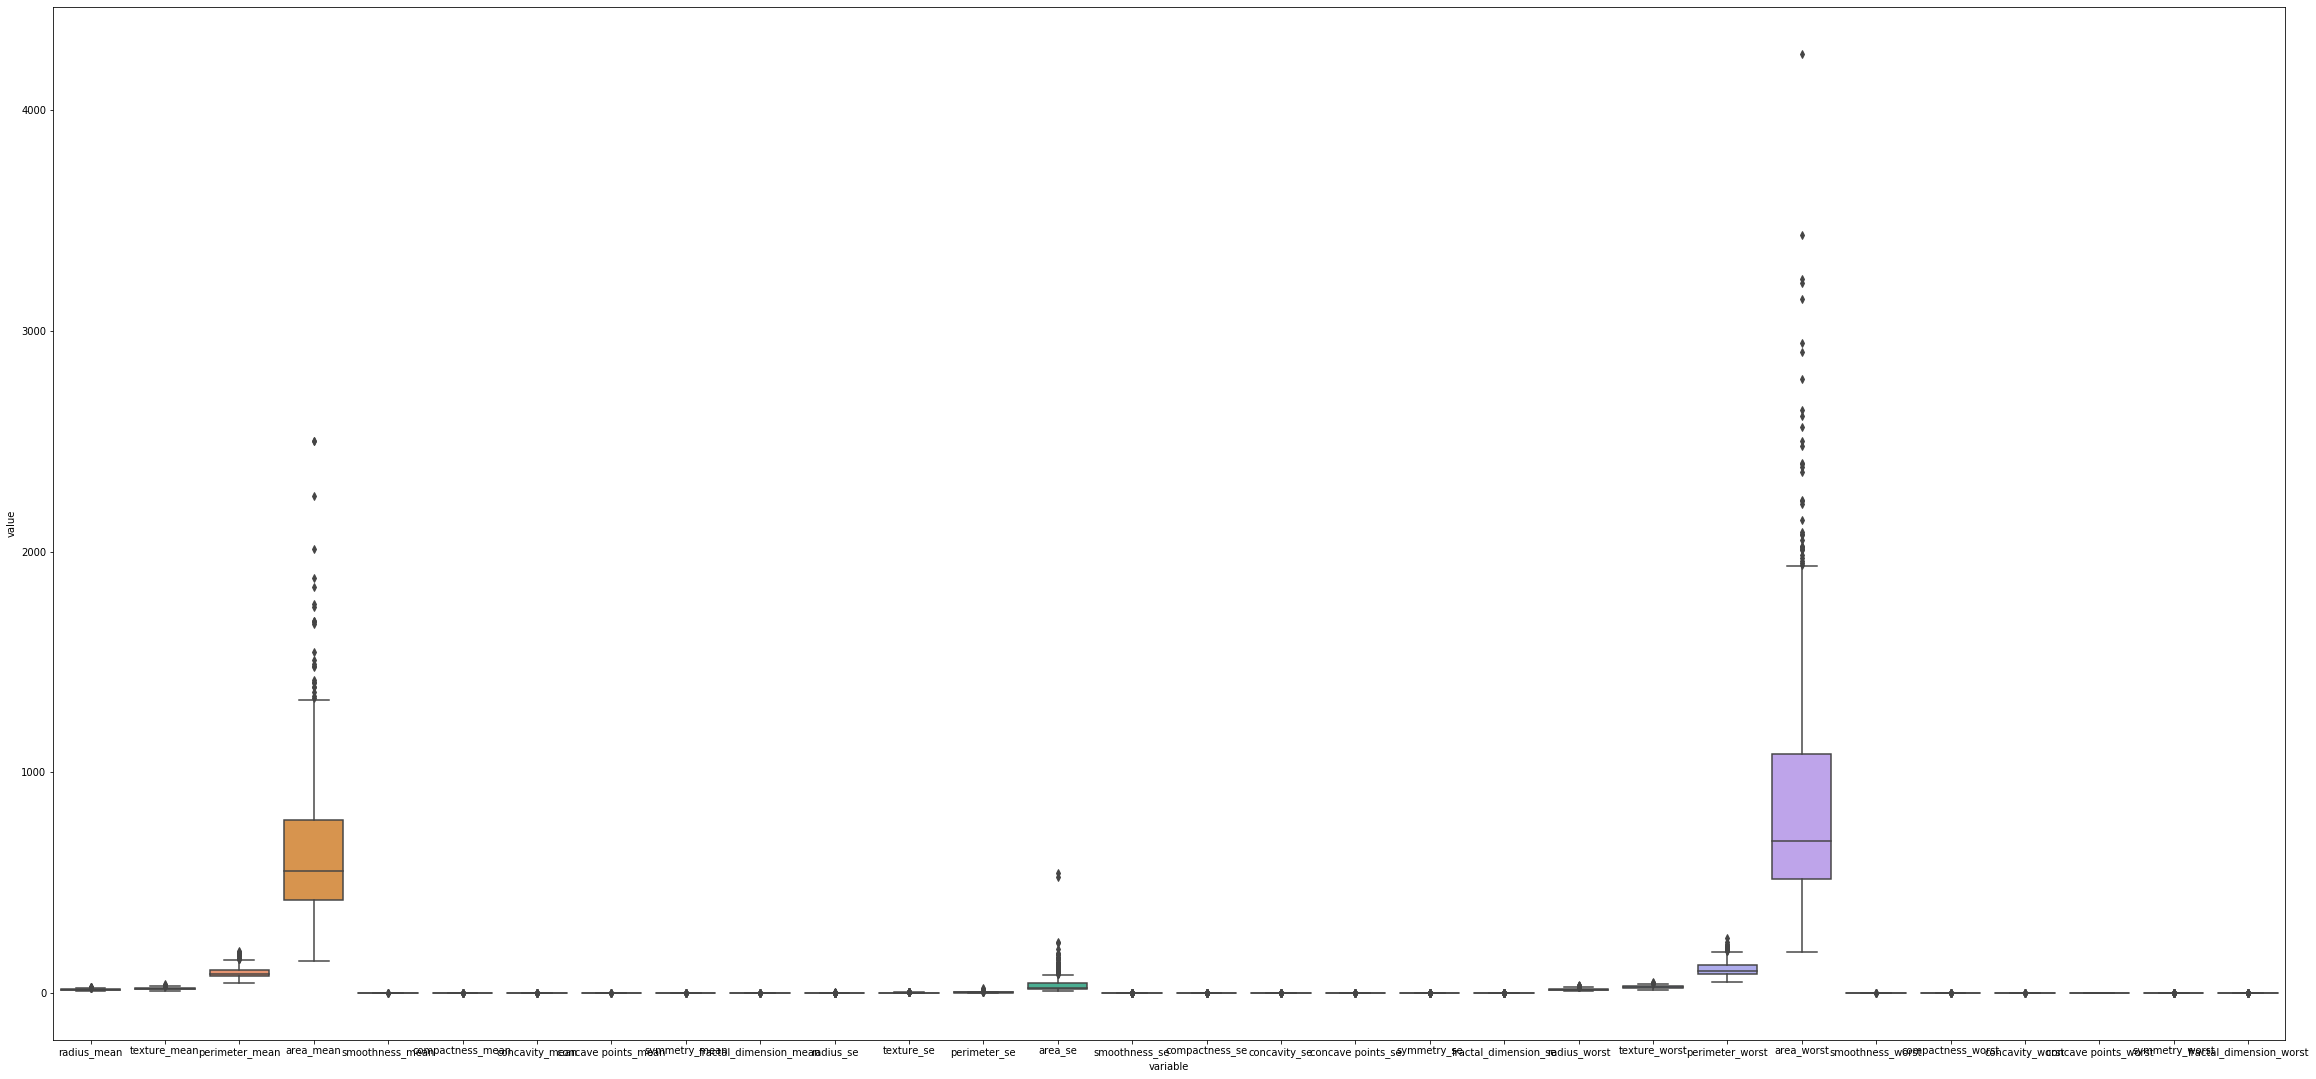

In [31]:
plt.figure(figsize=(40,19))
cols= ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
sns.boxplot(x="variable", y="value", data=pd.melt(df[cols]))
plt.show()

In [32]:
df['diagnosis']=df['diagnosis'].map({'M':0, 'B':1})

In [34]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [35]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [38]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [39]:
dc = DecisionTreeClassifier()
rc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
knnc = KNeighborsClassifier()

In [40]:
classifiers = [('Decision Tree Classifier', dc),
              ('Random Forest Classifier', rc),
              ('KNeighbors Classifier', knnc),
             ('Ada Boost Classifier', abc),
             ('Gradient Boosting Classifier', gbc)]

In [41]:
for reg_name, reg in classifiers:
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    #y_pred = y_pred.reshape(-1,1)
    print(reg_name, accuracy_score(y_test, y_pred))

Decision Tree Classifier 0.958041958041958
Random Forest Classifier 0.965034965034965
KNeighbors Classifier 0.951048951048951
Ada Boost Classifier 0.958041958041958
Gradient Boosting Classifier 0.965034965034965


In [42]:
import pickle

In [43]:
cancer_model = "cancer_model.pkl"  
with open(cancer_model, 'wb') as file:  
    pickle.dump(gbc, file)